slope =  [2.02274194]  intercept =  -1.1237705148551775


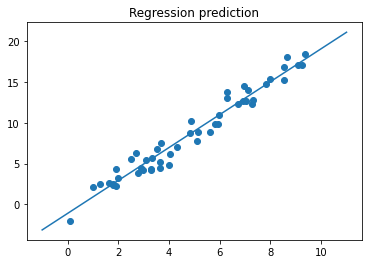

In [3]:
"""linear regression 
Assignment: read in the csv file (fit_data.csv) and fit to various functional forms that seem most appropriate.
This is different from the data that is generated here. You are provided data and must use linear regression to 
fit possibly polynomial models. Plot out the results. Incorporate BIC into your working programs, looping through 
the number of parameters to find the best model for each. Note: the first column is the independent variable.
The second, 3rd and 4th columns are the dependent variables for each of 3 different sets of data. Find the best 
polynomial fit to each using LinearRegression and BIC (use BIC method I presented in class).

Try to get as much done for class on Thursday. We may work out kinks together in class, as needed, but please be 
prepared to share and contribute."""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState()### set seed for reproducibility
x = 10 * rng.rand(50)## num of data pts
y = 2 * x -1 +rng.randn(50)## add normal random numbers as noise
## Plot this as a scatter plot in matplotlib

### create feature matrix, X:
X = x[:,np.newaxis]### create column vector of features for fit

#### Perform predictive regression using sklearn - must define a linear regression model ###
predictiveModel = LinearRegression(fit_intercept = True)### Setting this to False gives a poor fit, esp if yintercept is large in magnitude.

##Then use the "fit()"" method associated with this model:
predictiveModel.fit(X,y)

## find the coefficients - slope an intercept (hit tab after typing the period and find the correct values)
print('slope = ', predictiveModel.coef_ ,' intercept = ', predictiveModel.intercept_)
###generate new data for the model to predict y values of from linear regression###
xTest = np.linspace(-1,11,20)
XTest = xTest[:,np.newaxis]### need as column vector for predictive regression

## predict values using the model and new independent variable values:
yfit = predictiveModel.predict(XTest)  ## predicts y values from any x input using best fit line
### plot original data and fitted data (predicted values)
plt.plot(XTest, yfit)
plt.scatter(X, y)
plt.title("Regression prediction")
plt.show()
### note: sklearn cares less about error... it is predicting the future values, so the mean given data. for error estimates, use statsmodels or similar as above

In [42]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [7]:
data = pd.read_csv("fit_data.csv")

In [8]:
data.describe()

,Unnamed: 0,Data1,Data2,Data3
count,60.000000,60.000000,60.000000,60.000000
mean,-0.250000,12.675085,9.276796,-9.361433
std,8.732125,33.052124,32.138403,63.042546
min,-15.000000,-14.319727,-46.173254,-197.106843
25%,-7.625000,0.528933,-13.671375,-23.857673
50%,-0.250000,6.494599,2.118704,-7.362766
75%,7.125000,12.957111,24.659357,18.838509
max,14.500000,203.872217,96.572766,128.995515


In [9]:
data.head()

,Unnamed: 0,Data1,Data2,Data3
0,-15.0,203.872217,-36.404848,-197.106843
1,-14.5,139.846751,-12.371533,-187.128883
2,-14.0,64.135367,-14.191471,-174.067950
3,-13.5,48.564798,10.531590,-118.215406
4,-13.0,26.233289,-5.824560,-116.266031


In [39]:
col = data.columns
X = data[col[0]].values.reshape(-1, 1)
y1 = data[col[1]].values.reshape(-1, 1)
y2 = data[col[2]].values.reshape(-1, 1)
y3 = data[col[3]].values.reshape(-1, 1)

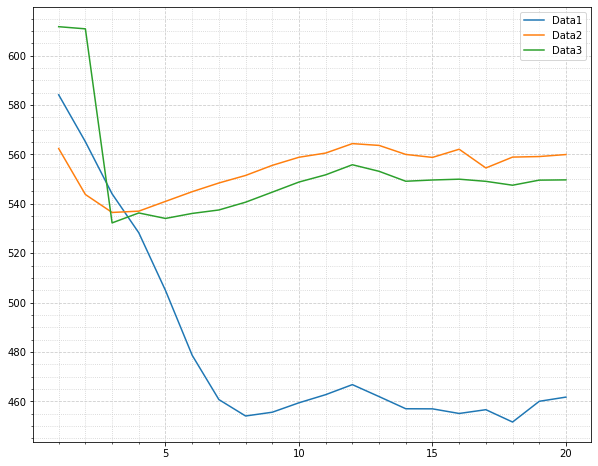

In [78]:
# Using BIC from OLS model in statsmodel package
degrees = range(1,21)
nCol = len(col) - 1
bic_val = np.zeros((len(degrees), nCol))

for deg in degrees:
    pf = PolynomialFeatures(degree=deg)
    Xp = pf.fit_transform(X)
    
    for c in range(1, nCol + 1):
        y = data[col[c]].values.reshape(-1, 1)
        linModel = sm.OLS(y, Xp).fit()
    
        bic_val[deg - 1, c - 1] = linModel.bic
        
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 8))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(1))

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

ax.plot(range(1,21), bic_val[:, 0], label='Data1')
ax.plot(range(1,21), bic_val[:, 1], label='Data2')
ax.plot(range(1,21), bic_val[:, 2], label='Data3')


plt.minorticks_on()
plt.legend()
plt.show()

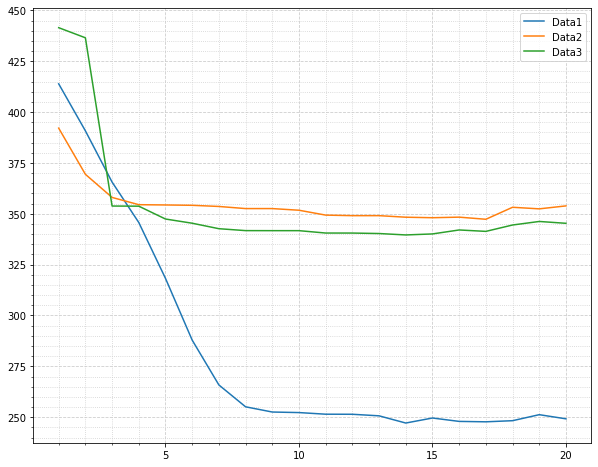

In [83]:
# Using customized BIC
degrees = range(1,21)
nCol = len(col) - 1
def BIC(y, yhat, k, weight = 1):
    """
    k is the number of parameters in the model.
    """
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + weight*k*np.log(n)
    return B

bic_val = np.zeros((len(degrees), nCol))

for deg in degrees:
    pf = PolynomialFeatures(degree=deg)
    Xp = pf.fit_transform(X)
    
    for c in range(1, nCol + 1):
        y = data[col[c]].values.reshape(-1, 1)
        linModel = LinearRegression()
        linModel.fit(Xp, y)
        ypredict = linModel.predict(Xp)
    
        bic_val[deg - 1, c - 1] = BIC(y, ypredict, 2)
        
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 8))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(1))

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

ax.plot(range(1,21), bic_val[:, 0], label='Data1')
ax.plot(range(1,21), bic_val[:, 1], label='Data2')
ax.plot(range(1,21), bic_val[:, 2], label='Data3')


plt.minorticks_on()
plt.legend()
plt.show()

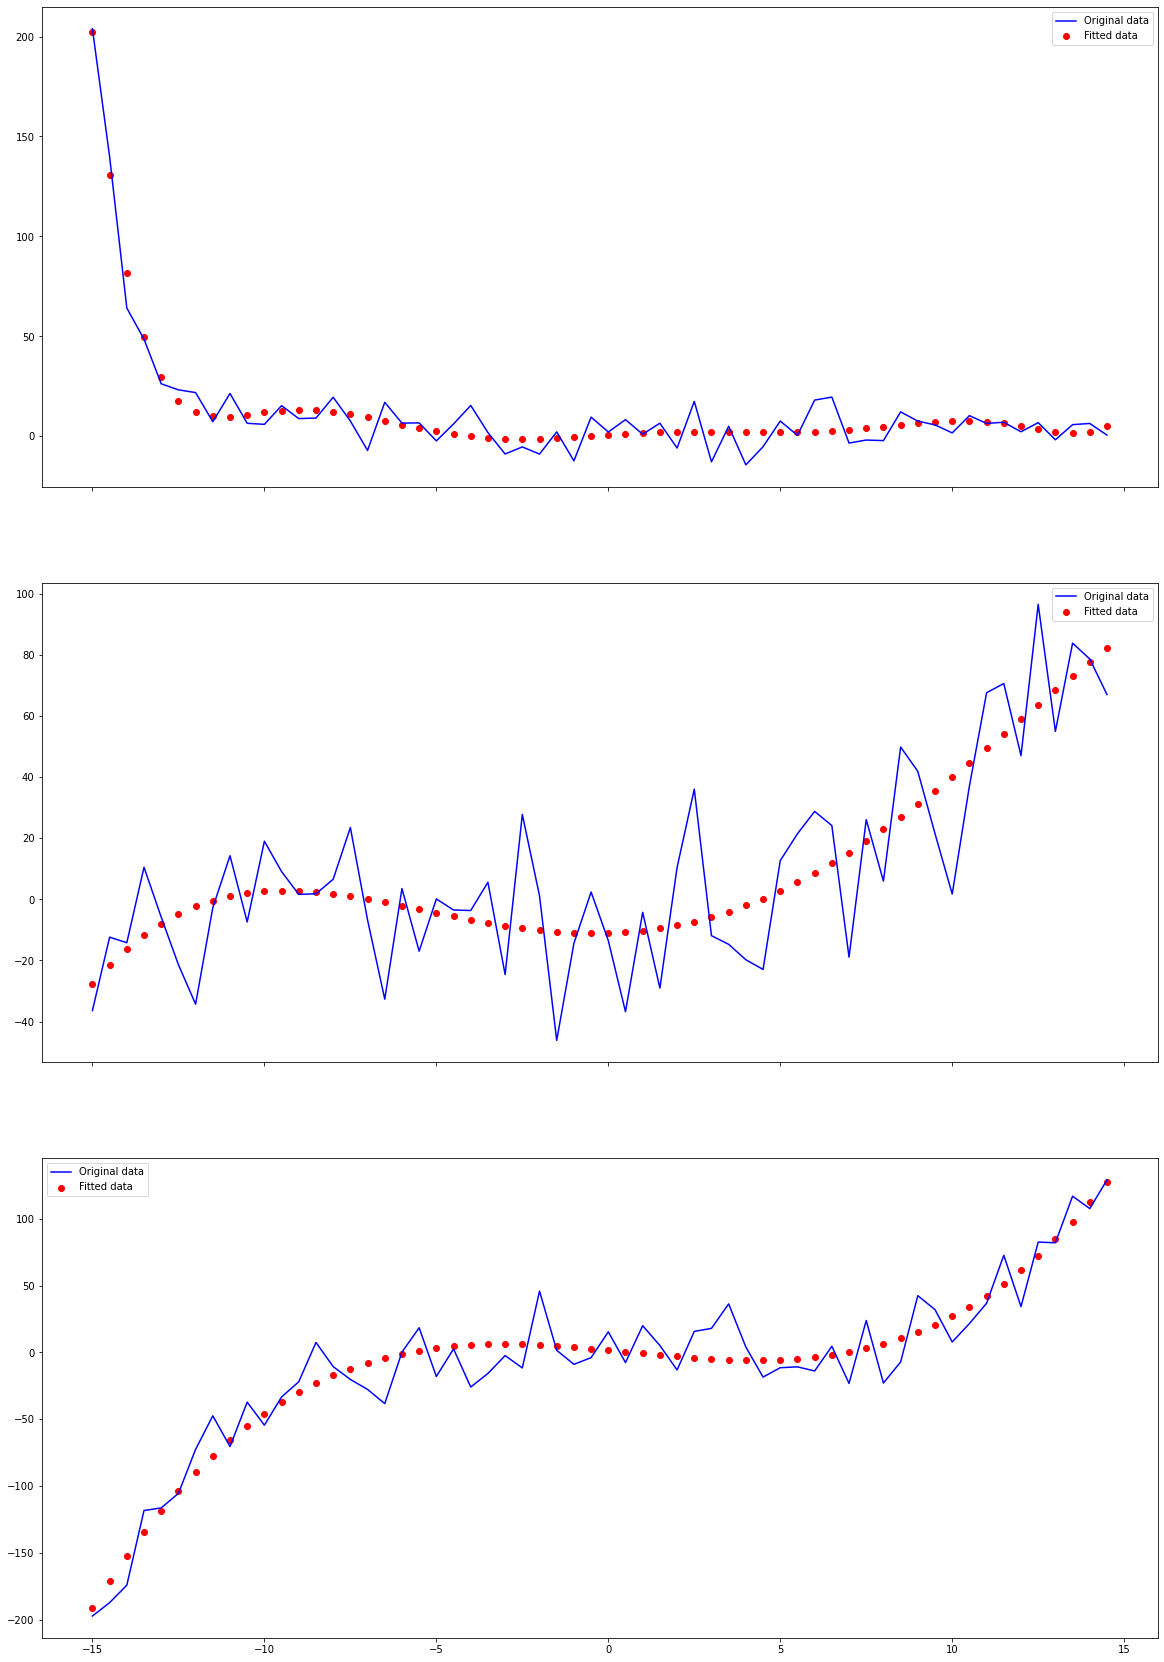

In [88]:
# Plot out the results
best_degree = [8, 4, 3] ## determine from the figure above
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(20, 30))

for i in range(3):
    pf = PolynomialFeatures(degree=best_degree[i])
    Xp = pf.fit_transform(X)
    
    y = data[col[i+1]].values.reshape(-1, 1)
    linModel = sm.OLS(y, Xp).fit()
    ypredict = linModel.predict(Xp)
    
    
    ax[i].plot(X, y, label='Original data', color='b')
    ax[i].scatter(X, ypredict, label='Fitted data', color='r')
    ax[i].legend()
plt.show()
    